#### Generating wordcloud for frontpage

In [8]:
import sys
!{sys.executable} -m pip install Pillow #wordcloud

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from random import sample
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import time
import glob
import os
from tqdm import tqdm_notebook as tqdm
import pickle as pkl

path = '/Users/Svesketerning/Google-Drev/experiments'
timestr = time.strftime("%Y%m%d-%H%M")

In [2]:
df_contexts = pd.read_feather('/Users/Svesketerning/Google-Drev/experiments/database-files/arxiv_contexts20210428-1155.feather')

In [3]:
text = []
for i in ['outer', 'theorem', 'meta', 'proof', 'other']:
    df_contexts[i]
    for j in range(len(df_contexts)):
        text.append(df_contexts[i][j])

In [4]:
n_sample = int(np.ceil(1*len(text)))
text_sample = sample(text,n_sample)
text_sample = " ".join(text_sample)
text_str = " ".join(text)

In [6]:
wordcloud_generic = WordCloud(max_words=2000, normalize_plurals=False, min_word_length=3).generate(text_str)

In [7]:
freq_dict = wordcloud_generic.words_
a_file = open("wordcloud_words.pkl2", "wb")
pkl.dump(freq_dict, a_file)
a_file.close()

In [29]:
freq_dict = pd.read_pickle('/Users/Svesketerning/Google-Drev/experiments/wordcloud_words.pkl')
keys_to_be_deleted = ['ref','section','Thu', 'e g', 'Indeed', 'e', 'word', 'Let u', 'c s', 'p h', 'ii',
                     'Amer Math', 'cf', 'Math soc', 'subsection', 'New York', 'et al','fill black',
                     'inner sep', 'edge','alway','Appendix','Fig','block', 'ref ref', 'j Math', 'thank',
                     'black circle', 'B','matrice','Figure','line width', 's g', 'Math soc','see e',
                      'resp','satisfie','paper', 'Math Soc', 'J Math','equation ref','problem ref','ref hold']
#freq_dict = wordcloud_generic.words_
for i in keys_to_be_deleted:
    freq_dict.pop(i, None)

In [25]:
def setListOfcolor_func(word=None, font_size=None,  
                     position=None, orientation=None,  
                     font_path=None, random_state=None):  
    #define the list of set colors  
    color_list = ["#666666", "#901a1e"]  

    #return a random color in the list  
    return np.random.choice(color_list)  
# Taken from https://github.com/amueller/word_cloud/issues/52

In [34]:
wc = WordCloud(width=4000, height=3000, max_words=2000, background_color= 'white', 
               scale = 1, colormap = 'Pastel1', contour_width = 0.2, contour_color = 'white')
wc.generate_from_frequencies(freq_dict)


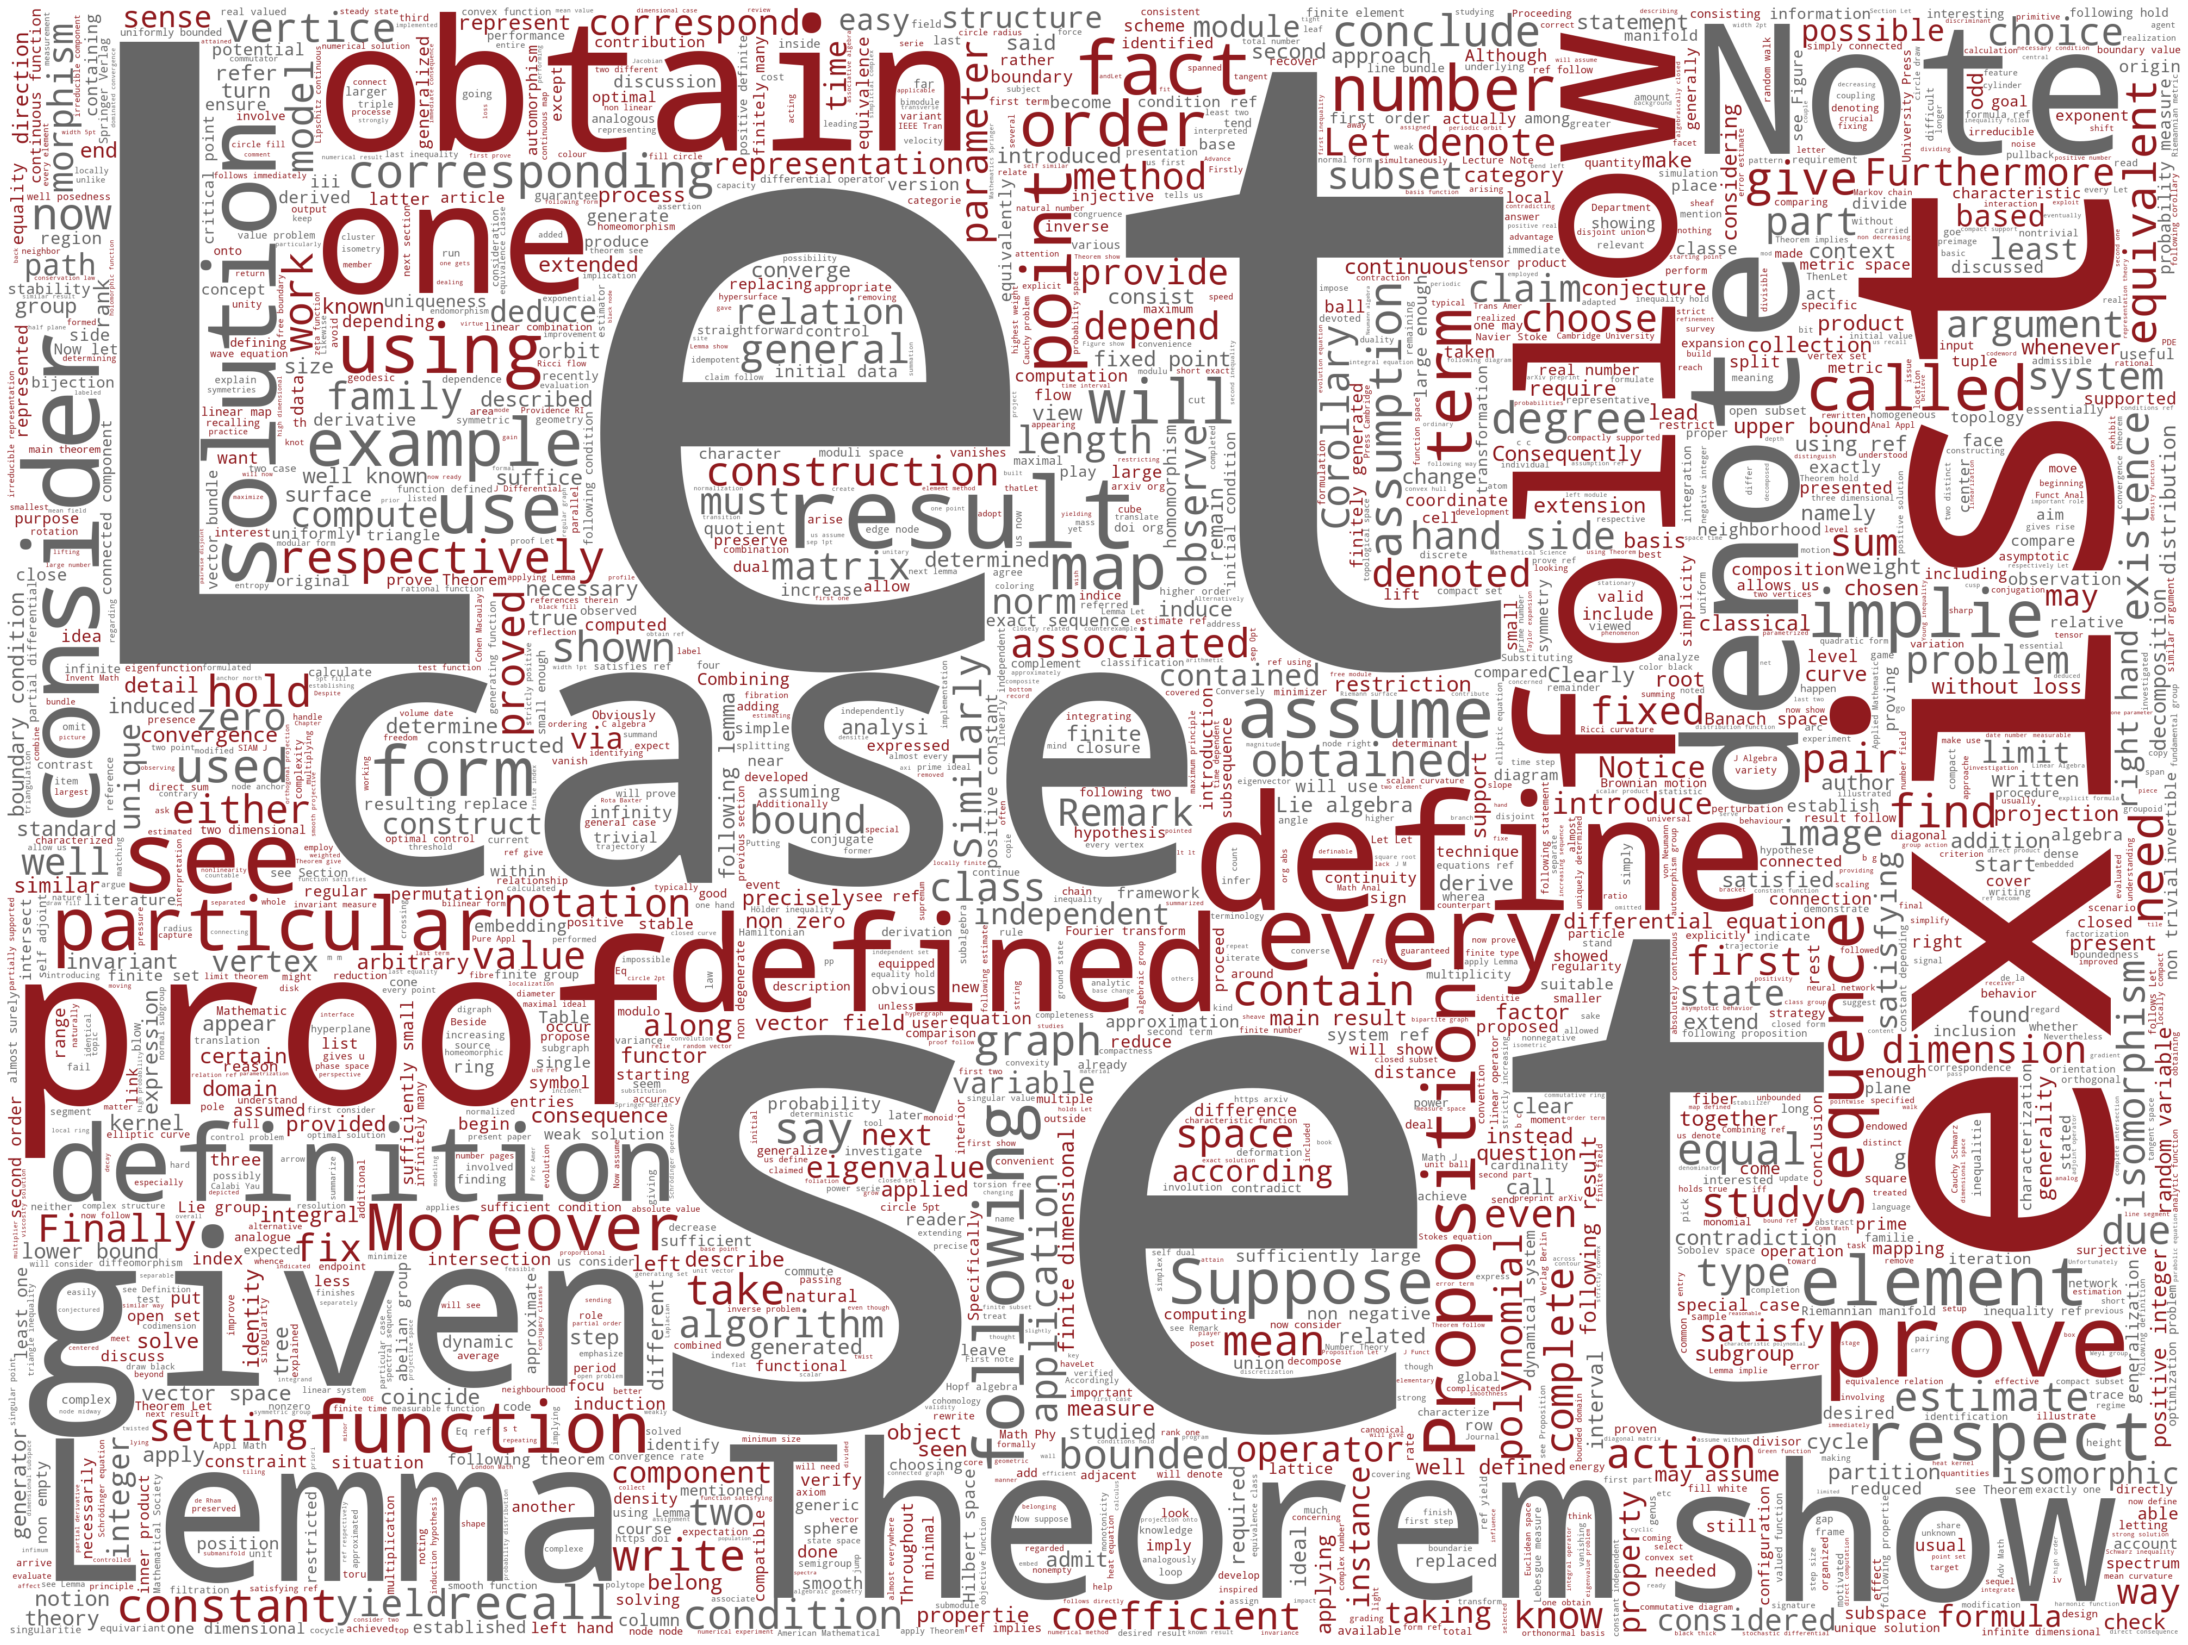

In [35]:
plt.figure(figsize = (40,30))
fig = plt.imshow(wc.recolor(color_func=setListOfcolor_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.show()
fig.figure.savefig(path+"/figures/wordcloud"+timestr+".pdf", bbox_inches='tight')